In this notebook, I'll show you how can can very simply load the whole training data (over 21M rows) in Kaggle kernel, only taking **2 lines of code** and **less than 2 minutes**.


# The problem
Normally, you should iterate on the train files doing something like this:

In [1]:
files = [f'train_{i}.csv' for i in range(10)]
df = pd.DataFrame()
for file in files:
    df_2 = pd.read_csv(file, dtype = dtypes)
    print('File', file, 'read')
    df = pd.concat([df,df_2], axis = 1)

There are two problems with this approach:  
* Too much memory is allocated, resulting in slowdowns and eventually crashing the environment because of out-of-memory errors.  
* It's very slow. In the kaggle kernel it takes between five to ten minutes.
* It's not parallelized. Every file is loaded sequentially only using one CPU core.

# The solution: Dask

<p  style="align:center"> <img src="https://mma.prnewswire.com/media/1832641/Dask_Logo_lockup_primary_Logo.jpg?p=facebook" width="250"/></p>


Dask is a flexible open-source Python library for parallel computing. Dask [1] scales Python code from multi-core local machines to large distributed clusters in the cloud. Dask provides a familiar user interface by mirroring the APIs of other libraries in the PyData ecosystem including: Pandas, Scikit-learn and NumPy. It also exposes low-level APIs that help programmers run custom algorithms in parallel.

Dask was created by Matthew Rocklin in December 2014 and has over 9.8k stars and 500 contributors on GitHub.

Dask is used by retail, financial, governmental organizations, as well as life science and geophysical institutes. Walmart, Wayfair, JDA GrubHub, General Motors, NVIDIA, Harvard Medical School, Capital One  and NASA are among the organizations that use Dask.
*[source](https://en.wikipedia.org/wiki/Dask_(software))*


# Loading data

In [2]:
import dask.dataframe as dd
dtypes_dict = {
    'game_num': 'int8', 'event_id': 'int8', 'event_time': 'float16',
    'ball_pos_x': 'float16', 'ball_pos_y': 'float16', 'ball_pos_z': 'float16',
    'ball_vel_x': 'float16', 'ball_vel_y': 'float16', 'ball_vel_z': 'float16',
    'p0_pos_x': 'float16', 'p0_pos_y': 'float16', 'p0_pos_z': 'float16',
    'p0_vel_x': 'float16', 'p0_vel_y': 'float16', 'p0_vel_z': 'float16',
    'p0_boost': 'float16', 'p1_pos_x': 'float16', 'p1_pos_y': 'float16',
    'p1_pos_z': 'float16', 'p1_vel_x': 'float16', 'p1_vel_y': 'float16',
    'p1_vel_z': 'float16', 'p1_boost': 'float16', 'p2_pos_x': 'float16',
    'p2_pos_y': 'float16', 'p2_pos_z': 'float16', 'p2_vel_x': 'float16',
    'p2_vel_y': 'float16', 'p2_vel_z': 'float16', 'p2_boost': 'float16',
    'p3_pos_x': 'float16', 'p3_pos_y': 'float16', 'p3_pos_z': 'float16',
    'p3_vel_x': 'float16', 'p3_vel_y': 'float16', 'p3_vel_z': 'float16',
    'p3_boost': 'float16', 'p4_pos_x': 'float16', 'p4_pos_y': 'float16',
    'p4_pos_z': 'float16', 'p4_vel_x': 'float16', 'p4_vel_y': 'float16',
    'p4_vel_z': 'float16', 'p4_boost': 'float16', 'p5_pos_x': 'float16',
    'p5_pos_y': 'float16', 'p5_pos_z': 'float16', 'p5_vel_x': 'float16',
    'p5_vel_y': 'float16', 'p5_vel_z': 'float16', 'p5_boost': 'float16',
    'boost0_timer': 'float16', 'boost1_timer': 'float16', 'boost2_timer': 'float16',
    'boost3_timer': 'float16', 'boost4_timer': 'float16', 'boost5_timer': 'float16',
    'player_scoring_next': 'O', 'team_scoring_next': 'O', 'team_A_scoring_within_10sec': 'int8',
    'team_B_scoring_within_10sec': 'int8'
}


df = dd.read_csv('../input/tabular-playground-series-oct-2022/train_*.csv', dtype = dtypes_dict)

The read_csv function doesn't load everything into memory. Instead it creates a [task graph].(https://docs.dask.org/en/latest/graphs.html)
It saves the columns and divides the datasets in partitions without loading them into memory (for now).

In [3]:
df

,game_num,event_id,event_time,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,p0_pos_y,p0_pos_z,p0_vel_x,p0_vel_y,p0_vel_z,p0_boost,p1_pos_x,p1_pos_y,p1_pos_z,p1_vel_x,p1_vel_y,p1_vel_z,p1_boost,p2_pos_x,p2_pos_y,p2_pos_z,p2_vel_x,p2_vel_y,p2_vel_z,p2_boost,p3_pos_x,p3_pos_y,p3_pos_z,p3_vel_x,p3_vel_y,p3_vel_z,p3_boost,p4_pos_x,p4_pos_y,p4_pos_z,p4_vel_x,p4_vel_y,p4_vel_z,p4_boost,p5_pos_x,p5_pos_y,p5_pos_z,p5_vel_x,p5_vel_y,p5_vel_z,p5_boost,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,player_scoring_next,team_scoring_next,team_A_scoring_within_10sec,team_B_scoring_within_10sec
npartitions=143,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int8,int8,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,object,object,int8,int8
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Every operation in dask is `Delayed` until we execute the `compute()` command.
For example, if we want to load the whole dataset into a pandas DataFrame, we can do it the the following command:

In [4]:
from datetime import datetime
start = datetime.now()

df = dd.read_csv('../input/tabular-playground-series-oct-2022/train_*.csv', dtype = dtypes_dict)
df = df.compute()

end = datetime.now()
time_readcsv = end - start
print(f'Time taken for reading data: {time_readcsv.seconds} seconds')

Time taken for reading data: 85 seconds


During the execution the code is using all the cores available in the Kaggle kernel.  
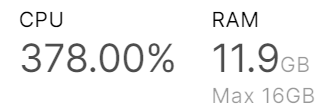

Now we have the whole dataset into memory. As you can see, the whole operation only takes 1 minute and 22 seconds.
It's much faster thanks to the parallelization. Another advantage is that by using the wildcard `*` we can avoid loops and load every file in just one line.

# Result
Now we have the full dataset loaded into pandas. You can perform EDA, run models or anything! Using the full dataset as training will give better result than only using a part of it.
Let's try running a model.

In [5]:
df.head(5)

,game_num,event_id,event_time,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,...,boost2_timer,boost3_timer,boost4_timer,boost5_timer,player_scoring_next,team_scoring_next,team_A_scoring_within_10sec,team_B_scoring_within_10sec,column,dtype
0,1.0,-22.0,-33.31250,-0.0,0.0,1.854492,-0.0,0.0,0.0,41.81250,...,0.0,0.0,0.0,0.0,3,B,0.0,0.0,NaN,NaN
1,1.0,-22.0,-33.21875,-0.0,0.0,1.854492,-0.0,0.0,0.0,42.25000,...,0.0,0.0,0.0,0.0,3,B,0.0,0.0,NaN,NaN
2,1.0,-22.0,-33.09375,-0.0,0.0,1.854492,-0.0,0.0,0.0,43.21875,...,0.0,0.0,0.0,0.0,3,B,0.0,0.0,NaN,NaN
3,1.0,-22.0,-33.00000,-0.0,0.0,1.854492,-0.0,0.0,0.0,43.90625,...,0.0,0.0,0.0,0.0,3,B,0.0,0.0,NaN,NaN
4,1.0,-22.0,-32.87500,-0.0,0.0,1.854492,-0.0,0.0,0.0,44.96875,...,0.0,0.0,0.0,0.0,3,B,0.0,0.0,NaN,NaN


We need to remove the last two columns added by Dask:

In [6]:
df = df.iloc[:,:-2]
df.head(5)

,game_num,event_id,event_time,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,...,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,player_scoring_next,team_scoring_next,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,1.0,-22.0,-33.31250,-0.0,0.0,1.854492,-0.0,0.0,0.0,41.81250,...,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0.0,0.0
1,1.0,-22.0,-33.21875,-0.0,0.0,1.854492,-0.0,0.0,0.0,42.25000,...,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0.0,0.0
2,1.0,-22.0,-33.09375,-0.0,0.0,1.854492,-0.0,0.0,0.0,43.21875,...,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0.0,0.0
3,1.0,-22.0,-33.00000,-0.0,0.0,1.854492,-0.0,0.0,0.0,43.90625,...,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0.0,0.0
4,1.0,-22.0,-32.87500,-0.0,0.0,1.854492,-0.0,0.0,0.0,44.96875,...,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0.0,0.0


# Putting it all together

In [1]:
import dask.dataframe as dd
dtypes_dict = {
    'game_num': 'int8', 'event_id': 'int8', 'event_time': 'float16',
    'ball_pos_x': 'float16', 'ball_pos_y': 'float16', 'ball_pos_z': 'float16',
    'ball_vel_x': 'float16', 'ball_vel_y': 'float16', 'ball_vel_z': 'float16',
    'p0_pos_x': 'float16', 'p0_pos_y': 'float16', 'p0_pos_z': 'float16',
    'p0_vel_x': 'float16', 'p0_vel_y': 'float16', 'p0_vel_z': 'float16',
    'p0_boost': 'float16', 'p1_pos_x': 'float16', 'p1_pos_y': 'float16',
    'p1_pos_z': 'float16', 'p1_vel_x': 'float16', 'p1_vel_y': 'float16',
    'p1_vel_z': 'float16', 'p1_boost': 'float16', 'p2_pos_x': 'float16',
    'p2_pos_y': 'float16', 'p2_pos_z': 'float16', 'p2_vel_x': 'float16',
    'p2_vel_y': 'float16', 'p2_vel_z': 'float16', 'p2_boost': 'float16',
    'p3_pos_x': 'float16', 'p3_pos_y': 'float16', 'p3_pos_z': 'float16',
    'p3_vel_x': 'float16', 'p3_vel_y': 'float16', 'p3_vel_z': 'float16',
    'p3_boost': 'float16', 'p4_pos_x': 'float16', 'p4_pos_y': 'float16',
    'p4_pos_z': 'float16', 'p4_vel_x': 'float16', 'p4_vel_y': 'float16',
    'p4_vel_z': 'float16', 'p4_boost': 'float16', 'p5_pos_x': 'float16',
    'p5_pos_y': 'float16', 'p5_pos_z': 'float16', 'p5_vel_x': 'float16',
    'p5_vel_y': 'float16', 'p5_vel_z': 'float16', 'p5_boost': 'float16',
    'boost0_timer': 'float16', 'boost1_timer': 'float16', 'boost2_timer': 'float16',
    'boost3_timer': 'float16', 'boost4_timer': 'float16', 'boost5_timer': 'float16',
    'player_scoring_next': 'O', 'team_scoring_next': 'O', 'team_A_scoring_within_10sec': 'int8',
    'team_B_scoring_within_10sec': 'int8'
}


df = dd.read_csv('../input/tabular-playground-series-oct-2022/train_*.csv', dtype = dtypes_dict)
df = df.compute()

df = df.iloc[:,:-2]

# Saving to feather format
We save the result in a feather format that will be later posted as a new dataset.

In [2]:
df.reset_index(drop = True).to_feather('train.feather')

# Running a LightGBM model
Now that we have the data loaded, we can run a LightGBM model using the whole training set.

In [4]:
import gc
gc.collect()
from lightgbm import LGBMClassifier
df.dropna(inplace = True)
to_drop = ['game_num','event_id', 'event_time', 'player_scoring_next',
       'team_scoring_next',
       'team_B_scoring_within_10sec','team_A_scoring_within_10sec']
y_b = df['team_B_scoring_within_10sec']
y_a = df['team_A_scoring_within_10sec']
df.drop(to_drop, inplace = True, axis = 1)
model = LGBMClassifier()
model.fit(df, y_a)
print('Model A trained')
import pandas as pd
X_test = pd.read_csv('../input/tabular-playground-series-oct-2022/test.csv')
X_test.drop('id', axis = 1, inplace = True)
y_a_pred = model.predict_proba(X_test)
del model
gc.collect()
model = LGBMClassifier()
model.fit(df, y_b)
print('Model B trained')
y_b_pred = model.predict_proba(X_test)

submission = pd.read_csv('../input/tabular-playground-series-oct-2022/sample_submission.csv', usecols = ['id'])
submission['team_A_scoring_within_10sec'] = y_a_pred[:,1]
submission['team_B_scoring_within_10sec'] = y_b_pred[:,1]
submission.to_csv('submission.csv', index = False)

print('Submission saved')

Model A trained
Model B trained
Submission saved


# Scoring
The current scoring is 0.201, which at the time of writing puts us in the top 40% of the leaderboard. That's not bad for running a model with default parameters on the original dataset.